In [25]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

__author__ = "Maximillian Philipp Barth"

######################################### DISCLAIMER ###############################################

# This class features the data exploration. Detailled interpretations can be found in the project
# report

####################################################################################################


# Import needed packages needed for EDA
import pandas as pd
import numpy as np

# Print all rows and columns. Don't hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# To do: change local path to relative path
bankingcalldata2 = pd.read_csv(r'C:\Users\D059161\PycharmProjects\DMTeam20_Uni_Mannheim\input\bank-additional-full.csv', sep=';')

print('Full dataset shape: ')
print(bankingcalldata2.shape)

Full dataset shape: 
(41188, 21)


In [13]:
from scipy.stats import skew


if bankingcalldata.isnull().values.any() == True:
    print('There are missing values in the dataset.')
else:
    print('There are no missing values in the dataset.')

columns = list(bankingcalldata.columns)
    
for column in columns:
    if bankingcalldata[column].isnull().values.any() == True:
        print('There are missing values in the column ' + column)

There are no missing values in the dataset.


In [293]:
# Print first 5 rows of all 21 columns to get a first impression of data
print(bankingcalldata.head())

   age  job  marital  education  default  housing  loan  contact  month  \
0   56    4        2          1        0        0     0        1      5   
1   57    8        2          4       -1        0     0        1      5   
2   37    8        2          4        0        1     0        1      5   
3   40    1        2          2        0        0     0        1      5   
4   56    8        2          4        0        0     1        1      5   

   day_of_week  duration  campaign  pdays  previous  poutcome  emp.var.rate  \
0            1       261         1    999         0         0           1.1   
1            1       149         1    999         0         0           1.1   
2            1       226         1    999         0         0           1.1   
3            1       151         1    999         0         0           1.1   
4            1       307         1    999         0         0           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          9

In [295]:
print(bankingcalldata.describe())

               age          job       marital     education       default  \
count  41188.00000  41188.00000  41188.000000  41188.000000  41188.000000   
mean      40.02406      4.72458      2.172769      4.747184     -0.208653   
std       10.42125      3.59456      0.608902      2.136482      0.406530   
min       17.00000      1.00000      1.000000      1.000000     -1.000000   
25%       32.00000      1.00000      2.000000      3.000000      0.000000   
50%       38.00000      3.00000      2.000000      4.000000      0.000000   
75%       47.00000      8.00000      3.000000      7.000000      0.000000   
max       98.00000     12.00000      4.000000      8.000000      1.000000   

            housing          loan       contact         month   day_of_week  \
count  41188.000000  41188.000000  41188.000000  41188.000000  41188.000000   
mean       0.499806      0.127659      0.365252      6.607896      2.979581   
std        0.545967      0.399297      0.481507      2.040998      1.

In [296]:
bankingcalldata.dtypes

age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int64
dtype: object

In [297]:
# Skewness is a measure of the symmetry in a distribution. A symmetrical dataset will have a skewness equal to 0. So, a normal distribution will have a skewness of 0. Skewness essentially measures the relative size of the two tails.
bankingcalldata.skew()

age               0.784697
job               0.450818
marital          -0.057136
education        -0.235148
default          -1.430785
housing          -0.442349
loan              1.013515
contact           0.559720
month             0.851510
day_of_week       0.000552
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
poutcome         -0.877789
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
y                 2.450330
dtype: float64

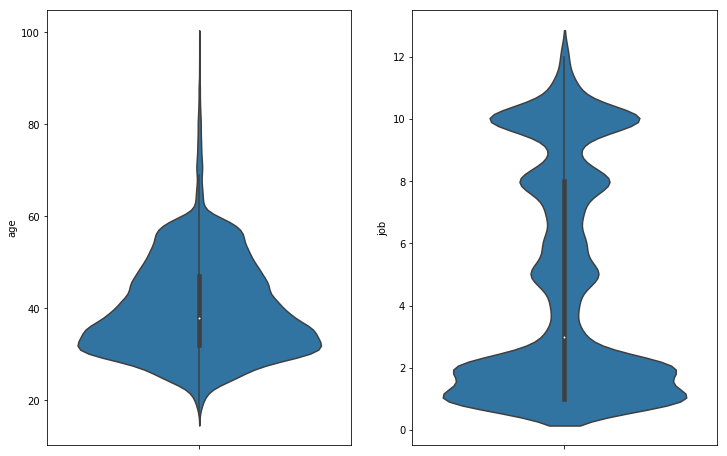

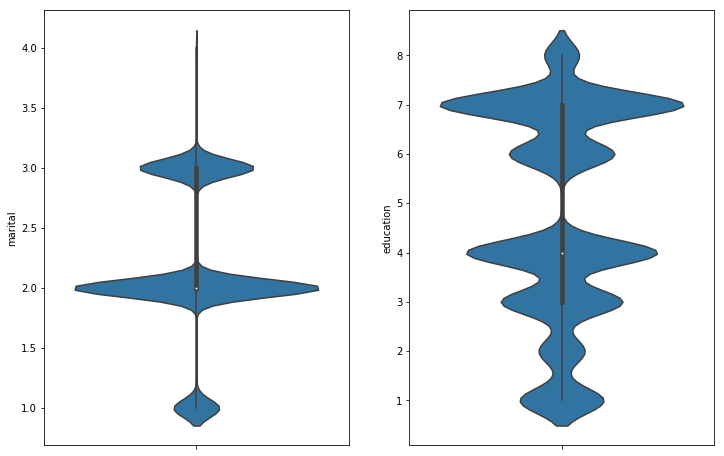

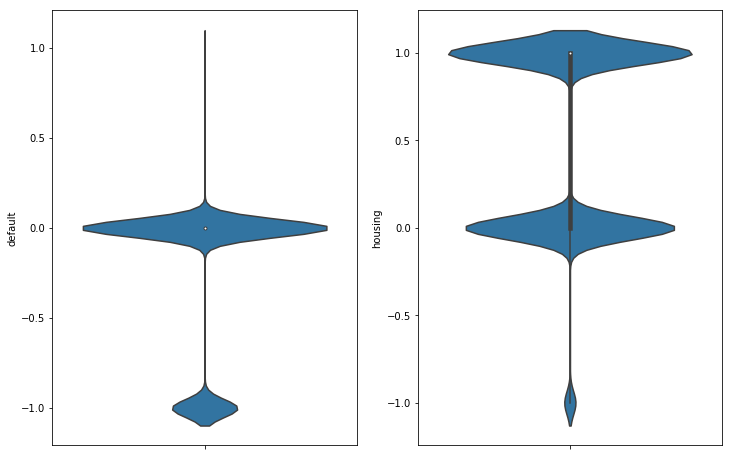

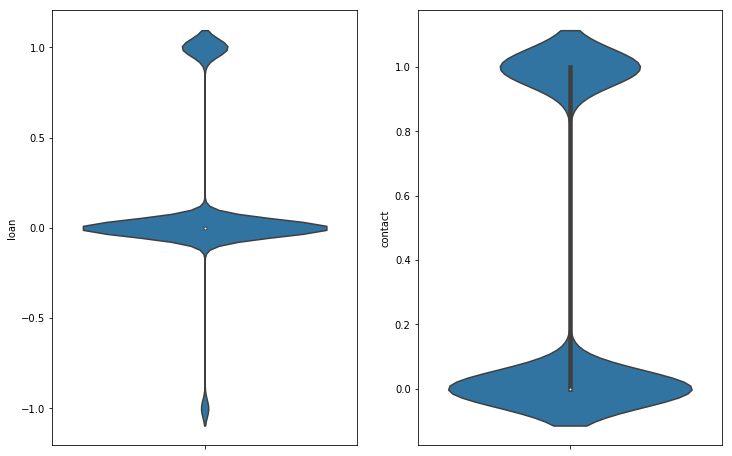

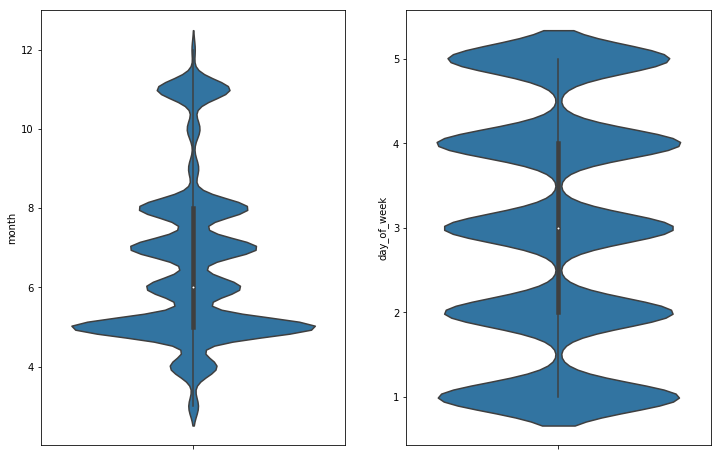

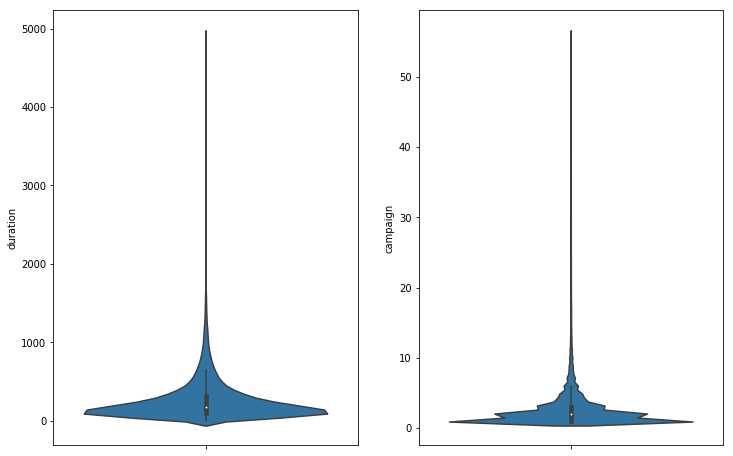

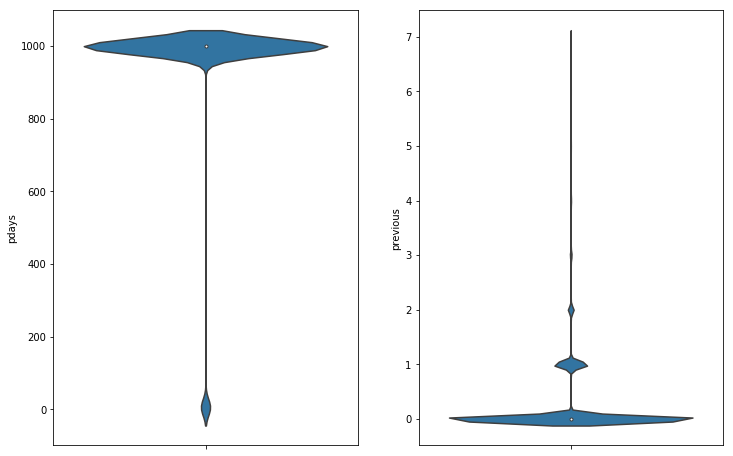

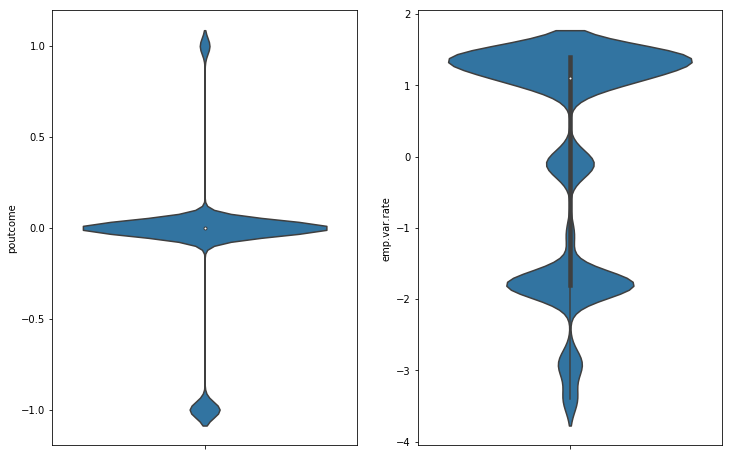

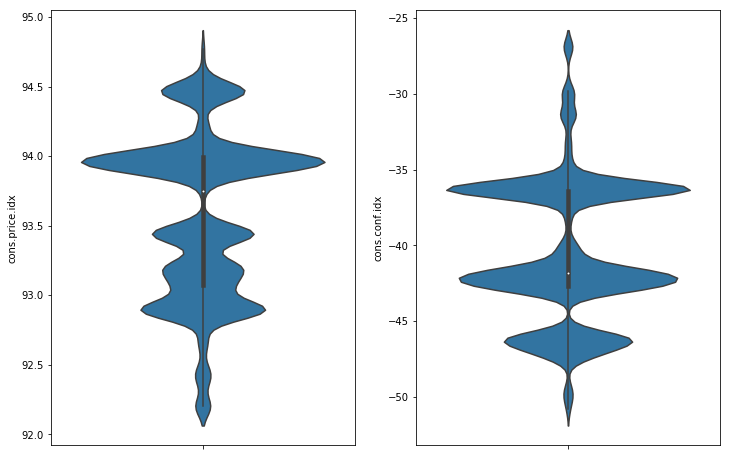

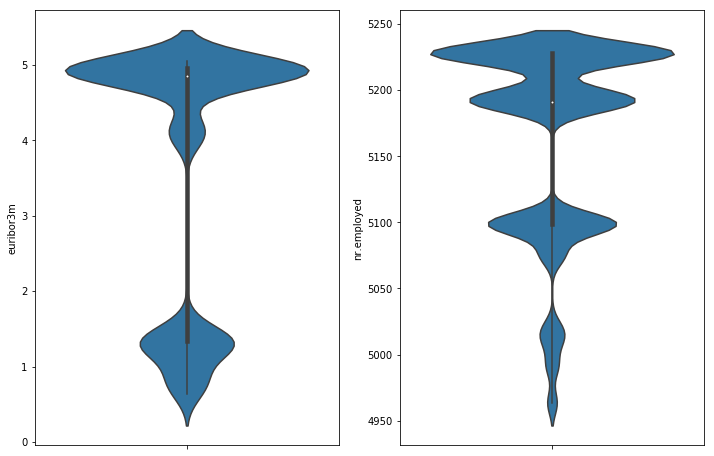

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

################################ Create a dataframe with only continuous features
bankingcalldata2["y"].replace(('yes', 'no'), (1,0), inplace = True)
bankingcalldata2.replace(('telephone', 'cellular'), (1,0), inplace = True)
bankingcalldata2["month"].replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'),  (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
bankingcalldata2["poutcome"].replace(('failure', 'nonexistent', 'success'), (-1, 0, 1), inplace = True)
bankingcalldata2["job"].replace(('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True)
bankingcalldata2["marital"].replace(('divorced','married','single','unknown'), (1,2,3,4), inplace = True)
bankingcalldata2["education"].replace(('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'), (1,2,3,4,5,6,7,8), inplace = True)
bankingcalldata2["default"].replace(('yes', 'no', 'unknown'), (1,0,-1), inplace = True)
bankingcalldata2["housing"].replace(('yes', 'no', 'unknown'), (1,0,-1), inplace = True)
bankingcalldata2["loan"].replace(('yes', 'no', 'unknown'), (1,0,-1), inplace = True)
bankingcalldata2["day_of_week"].replace(('mon', 'tue', 'wed', 'thu', 'fri'), (1,2,3,4,5), inplace = True)

data = bankingcalldata2.select_dtypes(include=['float64', 'int64'])
data_y = bankingcalldata2[bankingcalldata2["y"]==1]

################################ Get names of all columns
cols = data.columns 
cols_y = data_y.columns
################################ Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 10

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=bankingcalldata2, ax=ax[j])

plt.show()

################################ Plot violin for all attributes in a 7x2 grid for y=1
# for k in range(n_rows):
#     fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
#     for l in range(n_cols):
#         sns.violinplot(y=cols[k*n_cols+l], data=data_y, ax=ax[l])
#         sns.violinplot(y=cols[k*n_cols+l], data=data_y, ax=ax[l], color= 'green')
# plt.show()


In [ ]:
######################### Calculates pearson co-efficient for all combinations (corr computes pairwise correlation of columns, excluding NA/null values)
data_corr = data.corr()

######################### Set the threshold to select only highly correlated attributes
threshold = 0.005

######################### number of features considered
size = data.shape[1]

######################### List of pairs along with correlation above threshold
corr_list = []

######################### Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

######################### Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

######################### Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))




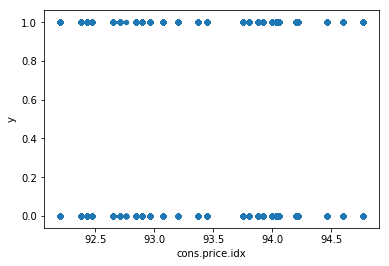

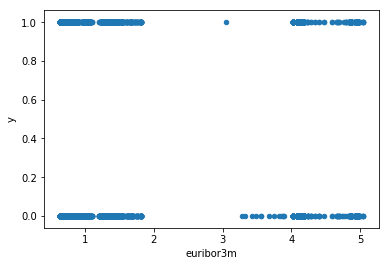

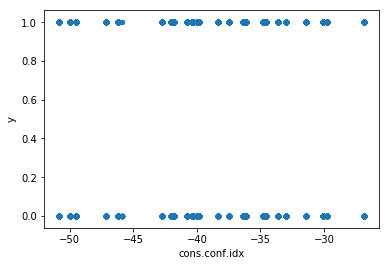

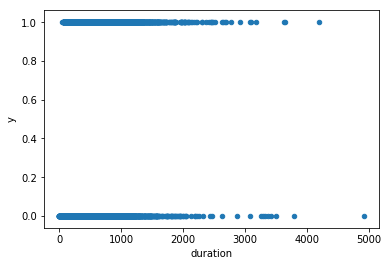

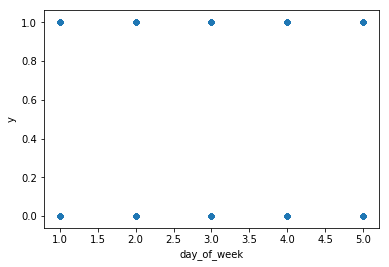

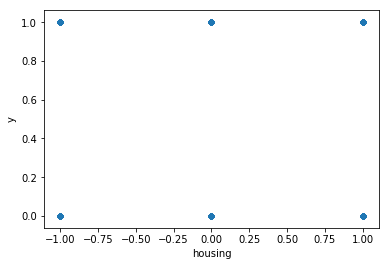

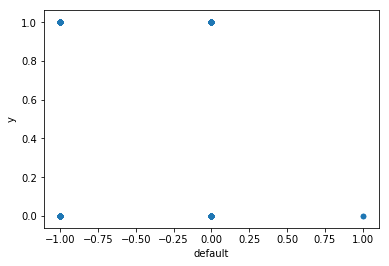

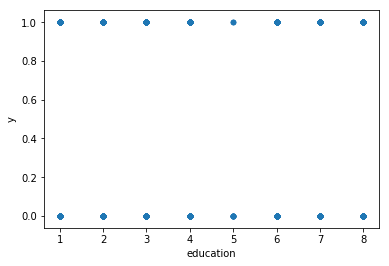

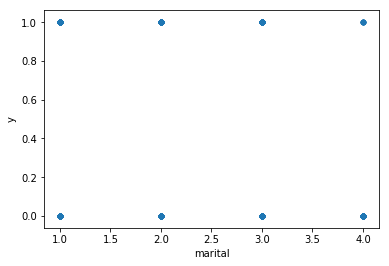

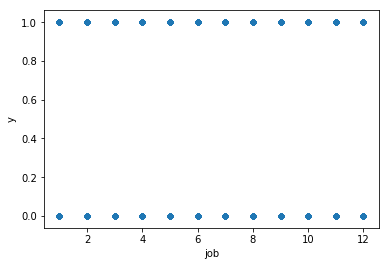

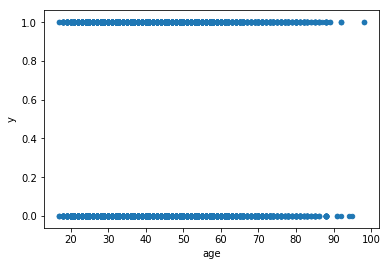

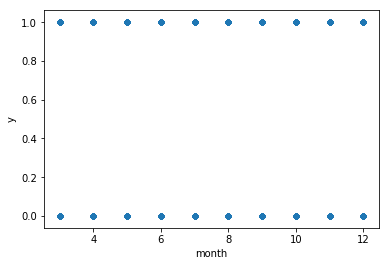

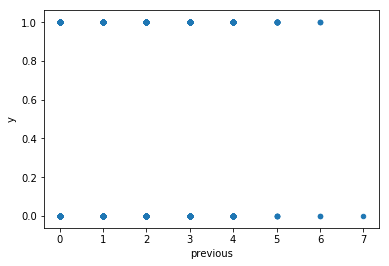

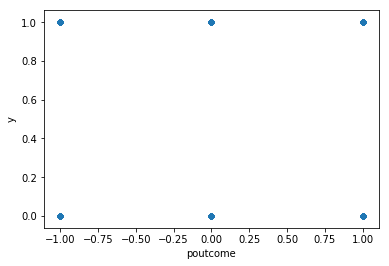

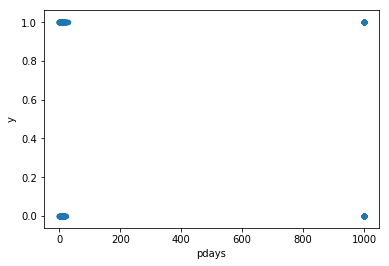

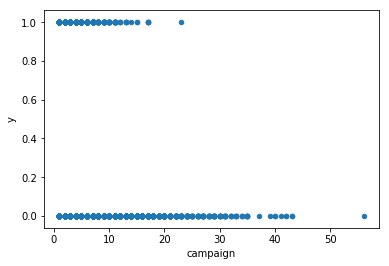

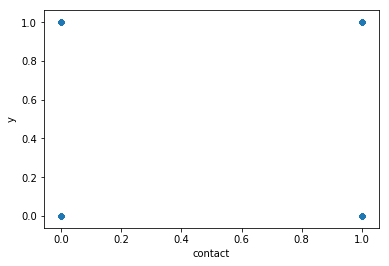

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

bankingcalldata = pd.read_csv(r'C:\Users\D059161\PycharmProjects\DMTeam20_Uni_Mannheim\input\bank-additional-full.csv', sep=';')

################################################## Replace categorical with int 
bankingcalldata["y"].replace(('yes', 'no'), (1,0), inplace = True)
bankingcalldata["contact"].replace(('telephone', 'cellular'), (1,0), inplace = True) # bins=[-0.5,0.5,1.5]
bankingcalldata["month"].replace(('jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'),  (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True) #bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5]
bankingcalldata["poutcome"].replace(('failure', 'nonexistent', 'success'), (-1, 0, 1), inplace = True) # bins=[-1.5,-0.5,0.5,1.5]
bankingcalldata["job"].replace(('admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'), (1,2,3,4,5,6,7,8,9,10,11,12), inplace = True) #bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5]
bankingcalldata["marital"].replace(('divorced','married','single','unknown'), (1,2,3,4), inplace = True) #bins=[0.5,1.5,2.5,3.5,4.5]
bankingcalldata["education"].replace(('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'), (1,2,3,4,5,6,7,8), inplace = True) # bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
bankingcalldata["default"].replace(('yes', 'no', 'unknown'), (1,0,-1), inplace = True) #bins=[-1.5,-0.5,0.5,1.5]
bankingcalldata["housing"].replace(('yes', 'no', 'unknown'), (1,0,-1), inplace = True) #bins=[-1.5,-0.5,0.5,1.5]
bankingcalldata["loan"].replace(('yes', 'no', 'unknown'), (1,0,-1), inplace = True)
bankingcalldata["day_of_week"].replace(('mon', 'tue', 'wed', 'thu', 'fri'), (1,2,3,4,5), inplace = True) # bins=[0.5,1.5,2.5,3.5,4.5,5.5]
# previous bins=[-0.5,0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5]
# campaign bins=[0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51]
# pdays bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,16.5,17.5,18.5,19.5,20.5,21.5,22.5,23.5,24.5,25.5,26.5,27.5,28.5,29.5,30.5]

################################################## Split dataset into y=1 and y=0 
save_1_bd = bankingcalldata[bankingcalldata["y"]==1]
save_0_bd = bankingcalldata[bankingcalldata["y"]==0]



arrAttr = ['cons.price.idx', 'euribor3m', 'cons.conf.idx', 'duration', 'day_of_week', 'housing', 'default', 'education', 'marital', 'job', 'age', 'month', 'previous', 'poutcome', 'pdays', 'campaign', 'contact']

for i in arrAttr:
 bankingcalldata.plot(kind="scatter", x=i, y='y')
 ################################################# Plot histograms on correlation of attributes and outcome 
 # plt.hist(save_0_bd[i], bins='auto', label='0')
 # plt.hist(save_1_bd[i], bins='auto', label='1')
 # plt.legend(prop={'size': 10})
 # plt.title("correlation between " + i + " and y")
 
 ################################################# Print value counts for both, 1 and 0 and calculate subscriptions/ non-subscriptions
 # print("Value counts for " + i + " and non subscriptions: ")
 # print(save_0_bd[i].value_counts().sort_index()) 
 # print("Value counts for " + i + " and subscriptions: ")
 # print(save_1_bd[i].value_counts().sort_index())
 # print("Conversion rate subscriptions / non subscriptions: ")
 # print(save_1_bd[i].value_counts().sort_index()/save_0_bd[i].value_counts().sort_index())
 plt.show()